In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("weather.csv")

In [4]:
data=data.dropna()

In [5]:
dt=data.values
X_train=dt[0:40633,0:17]
Y_train=dt[0:40633,-1].reshape(1,X_train.shape[0])
X_test=dt[40633:58090,0:17]
Y_test=dt[40633:58090,-1].reshape(1,X_test.shape[0])

In [6]:
X_train=X_train.T
X_test=X_test.T

In [7]:
def sig(x):
    return 1/(1+np.exp(-x))

In [8]:
def model(X,Y,lr,it):
    m=X.shape[1]
    n=X.shape[0]
    w=np.zeros((n,1))
    b=0
    cost_list=[]
    
    for i in range(it):
        z=np.dot(w.T,X)+b
        a=sig(z)
        cost=-(1/m)*np.sum(Y*np.log(a) + (1-Y)*np.log(1-a))
        dw=(1/m)*np.dot(a-Y,X.T)
        db=(1/m)*np.sum(a-Y)
        w=w-lr*dw.T
        b=b-lr*db.T
        cost_list.append(cost)
        if(i%(it/10)==0):
            print("cost is:",cost)
    return w,b,cost_list

In [9]:
iteration=10000
learn=0.000005
w,b,cost_list=model(X_train,Y_train,lr=learn,it=iteration)

cost is: 0.6931471805599453
cost is: 0.47582844352516357
cost is: 0.44373985971895485
cost is: 0.42652418227747185
cost is: 0.4162463048466953
cost is: 0.40958456232235313
cost is: 0.40497812350436707
cost is: 0.4016205357402154
cost is: 0.3990627249118392
cost is: 0.39703940369764285


<function matplotlib.pyplot.show(close=None, block=None)>

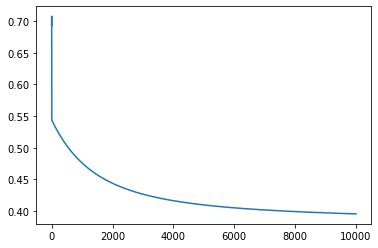

In [10]:
rng = np.arange(0, iteration)
plt.plot(rng,cost_list)
plt.show

In [11]:
def accuracy(x,y,w,b):
    z=np.dot(w.T,x)+b
    a=sig(z)
    a=a>0.5
    a=np.array(a,dtype='int64')
    acc=(1-np.sum(np.absolute(a-y))/y.shape[1])*100
    print("Accuracy:",acc,"%")

In [12]:
accuracy(X_test,Y_test,w,b)

Accuracy: 86.92215157243513 %
